In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'D:\ExcelR Assignments\Question\PCA\PCA\wine.csv')

In [4]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
for i in data.columns:
    print(f'Unique value in {i} column are {data[i].nunique()}')

Unique value in Type column are 3
Unique value in Alcohol column are 126
Unique value in Malic column are 133
Unique value in Ash column are 79
Unique value in Alcalinity column are 63
Unique value in Magnesium column are 53
Unique value in Phenols column are 97
Unique value in Flavanoids column are 132
Unique value in Nonflavanoids column are 39
Unique value in Proanthocyanins column are 101
Unique value in Color column are 132
Unique value in Hue column are 78
Unique value in Dilution column are 122
Unique value in Proline column are 121


### EDA

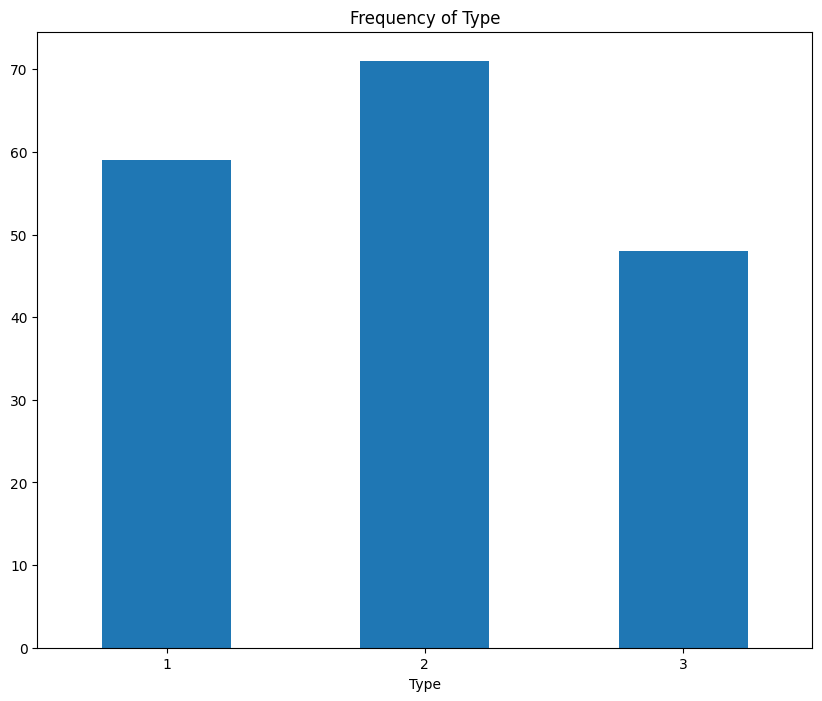

In [10]:
data['Type'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Type')
plt.xticks(rotation=0)
plt.xlabel('Type');

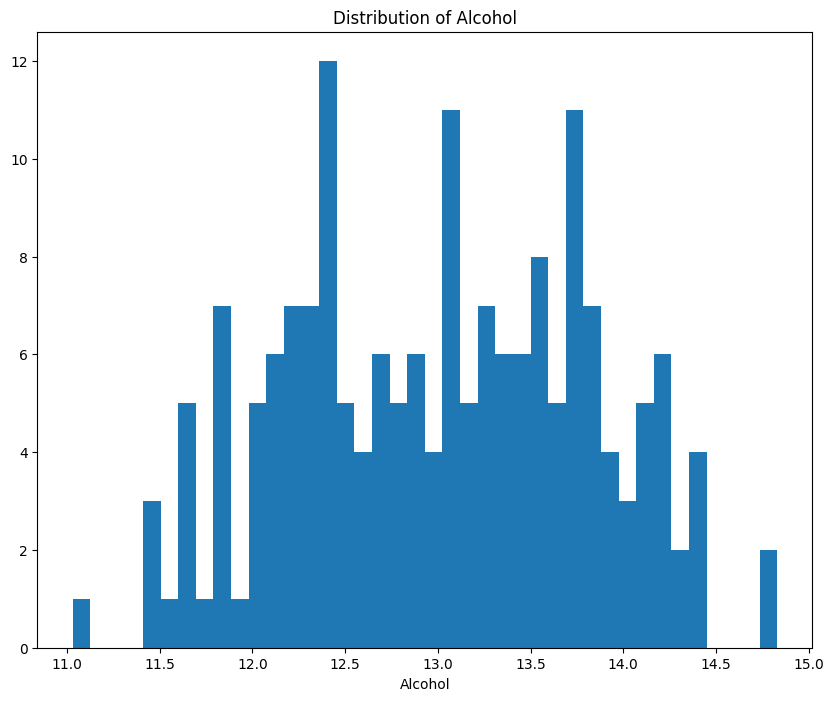

In [11]:
plt.hist(data['Alcohol'],bins=40)
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol');

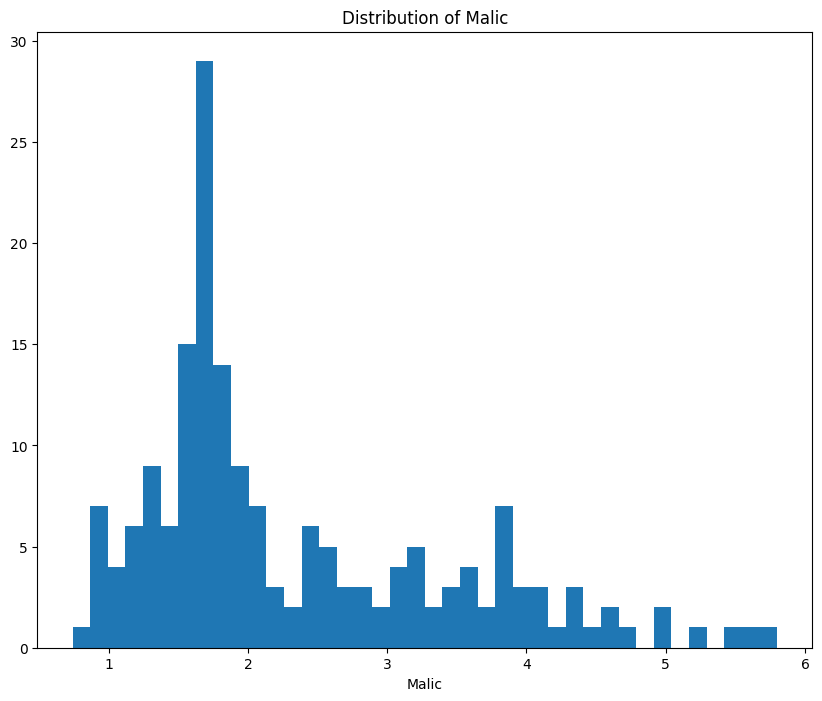

In [12]:
plt.hist(data['Malic'],bins=40)
plt.title('Distribution of Malic')
plt.xlabel('Malic');

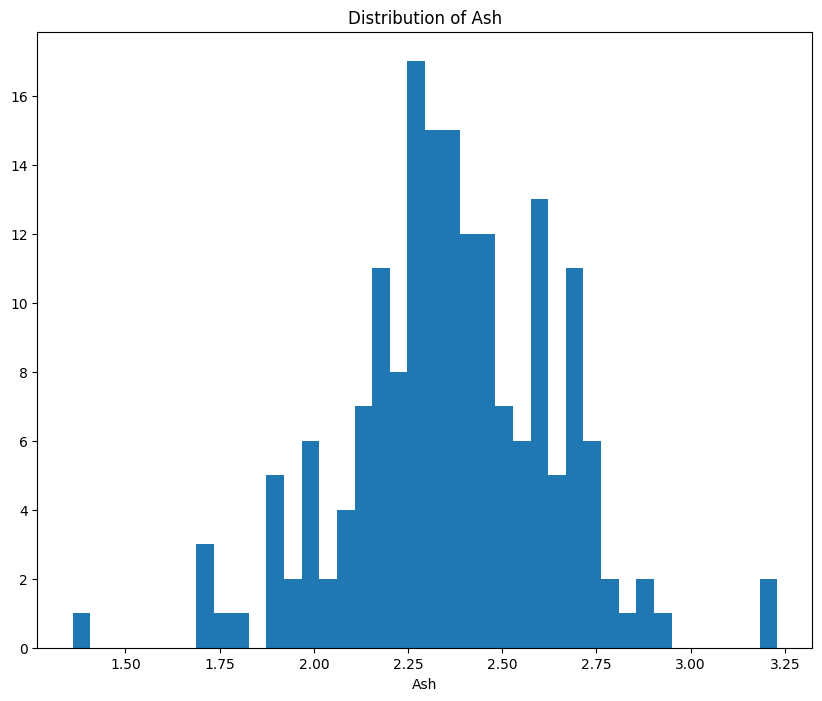

In [13]:
plt.hist(data['Ash'],bins=40)
plt.title('Distribution of Ash')
plt.xlabel('Ash');

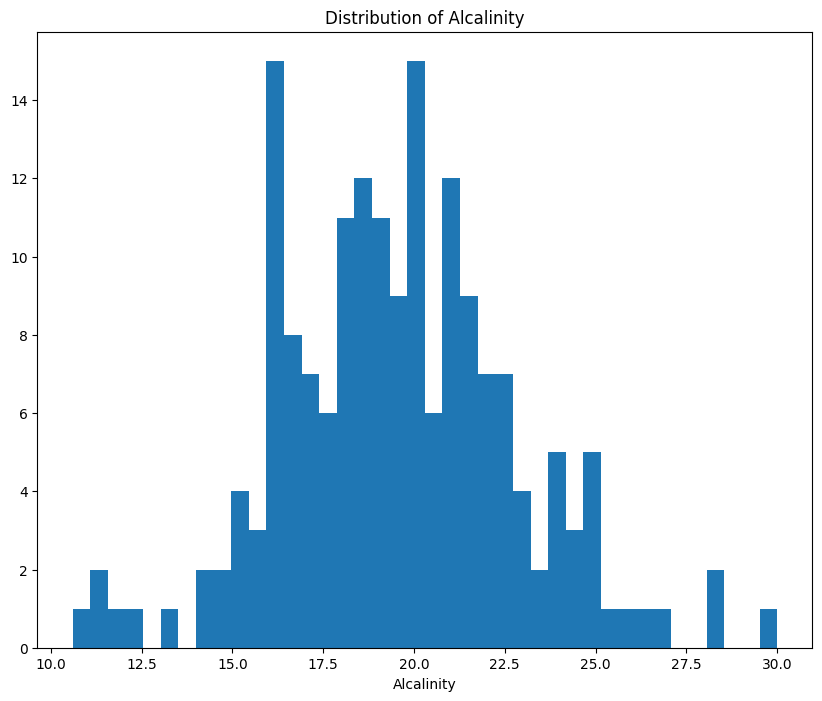

In [14]:
plt.hist(data['Alcalinity'],bins=40)
plt.title('Distribution of Alcalinity')
plt.xlabel('Alcalinity');

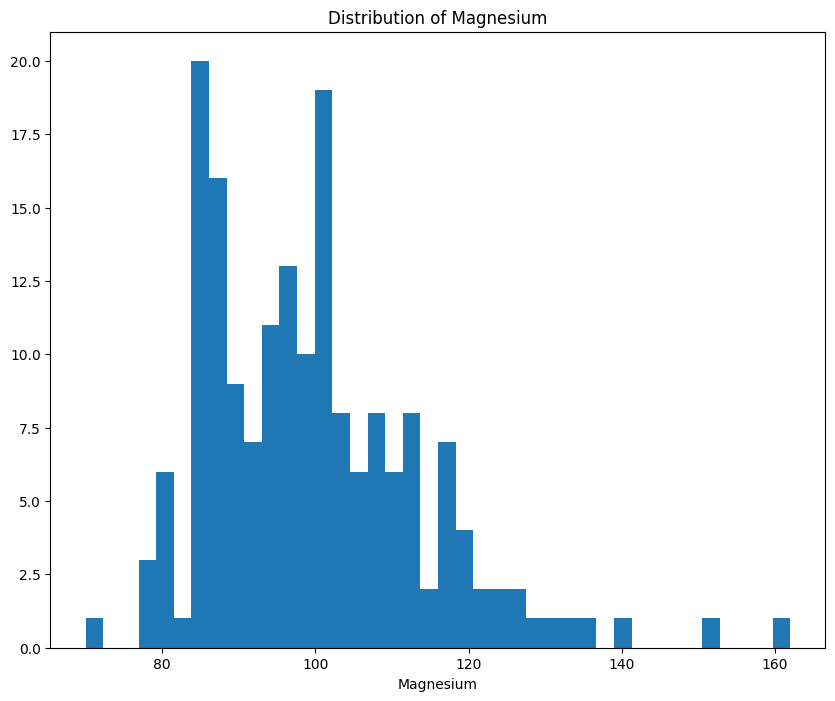

In [15]:
plt.hist(data['Magnesium'],bins=40)
plt.title('Distribution of Magnesium')
plt.xlabel('Magnesium');

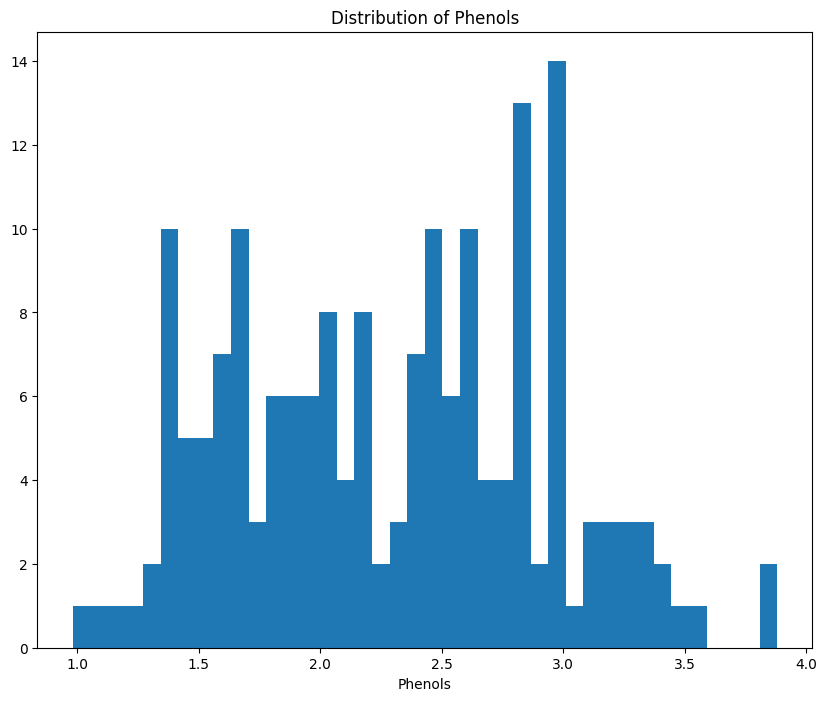

In [16]:
plt.hist(data['Phenols'],bins=40)
plt.title('Distribution of Phenols')
plt.xlabel('Phenols');

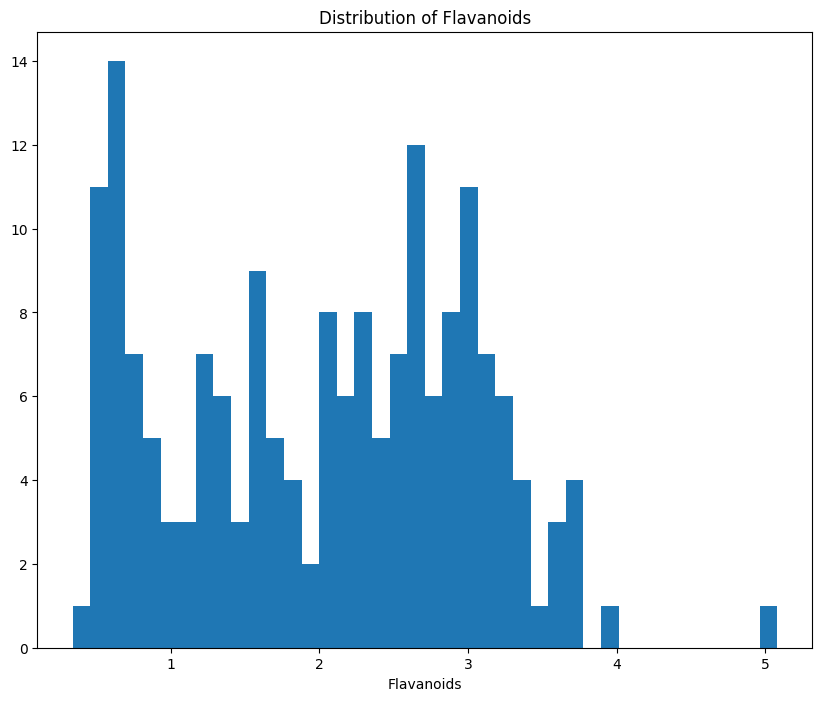

In [17]:
plt.hist(data['Flavanoids'],bins=40)
plt.title('Distribution of Flavanoids')
plt.xlabel('Flavanoids');

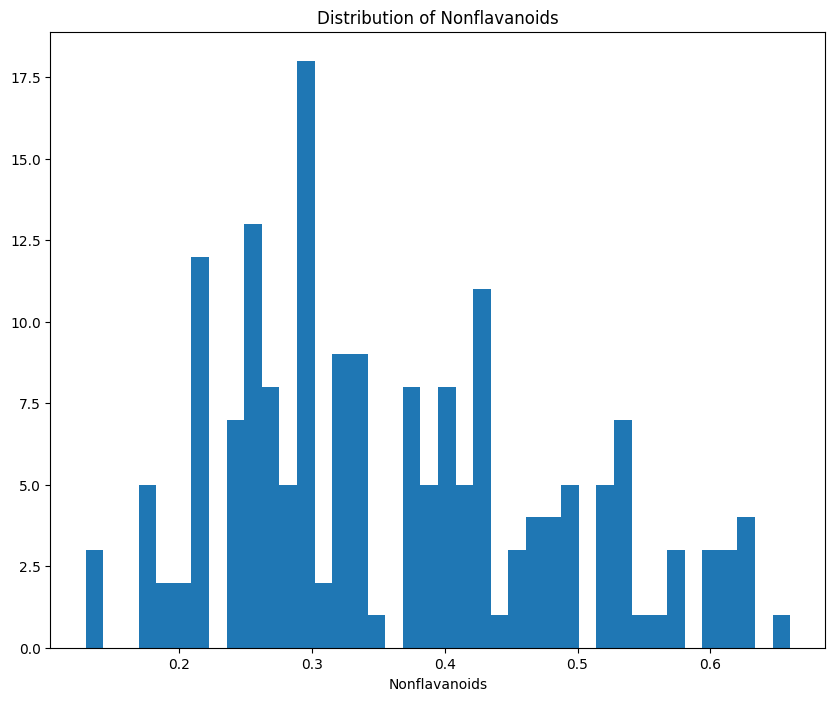

In [18]:
plt.hist(data['Nonflavanoids'],bins=40)
plt.title('Distribution of Nonflavanoids')
plt.xlabel('Nonflavanoids');

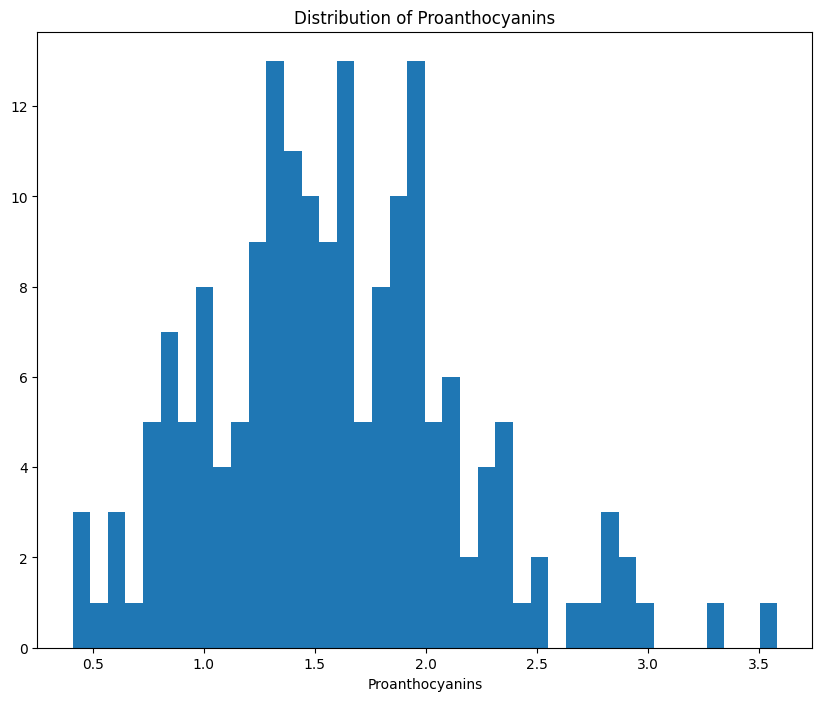

In [19]:
plt.hist(data['Proanthocyanins'],bins=40)
plt.title('Distribution of Proanthocyanins')
plt.xlabel('Proanthocyanins');

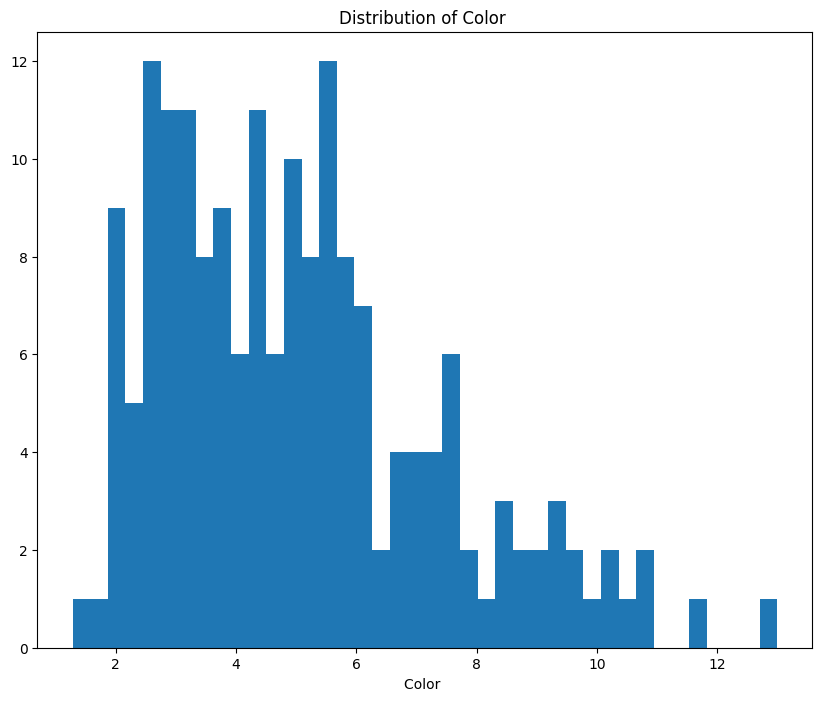

In [20]:
plt.hist(data['Color'],bins=40)
plt.title('Distribution of Color ')
plt.xlabel('Color ');

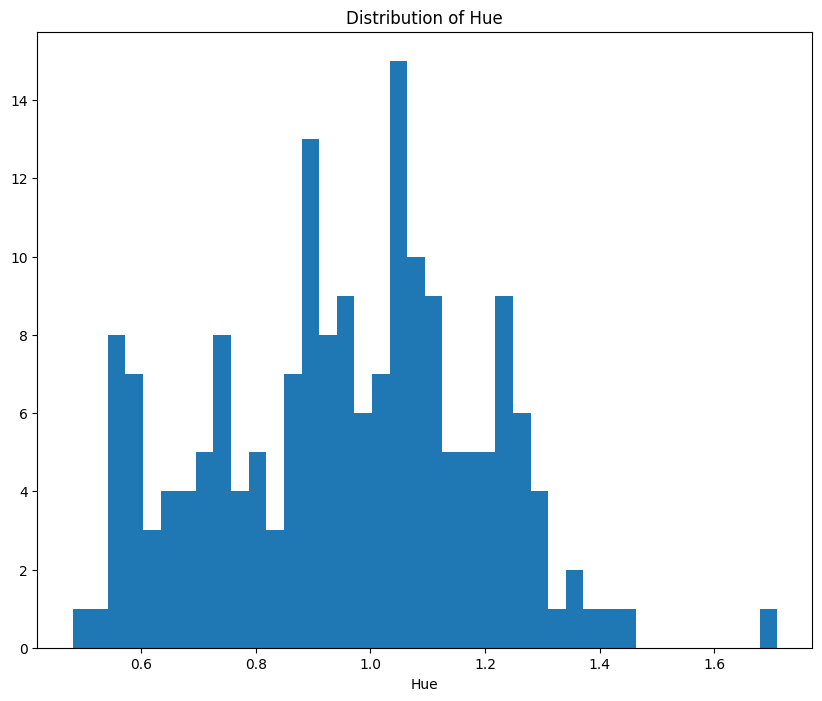

In [21]:
plt.hist(data['Hue'],bins=40)
plt.title('Distribution of Hue')
plt.xlabel('Hue');

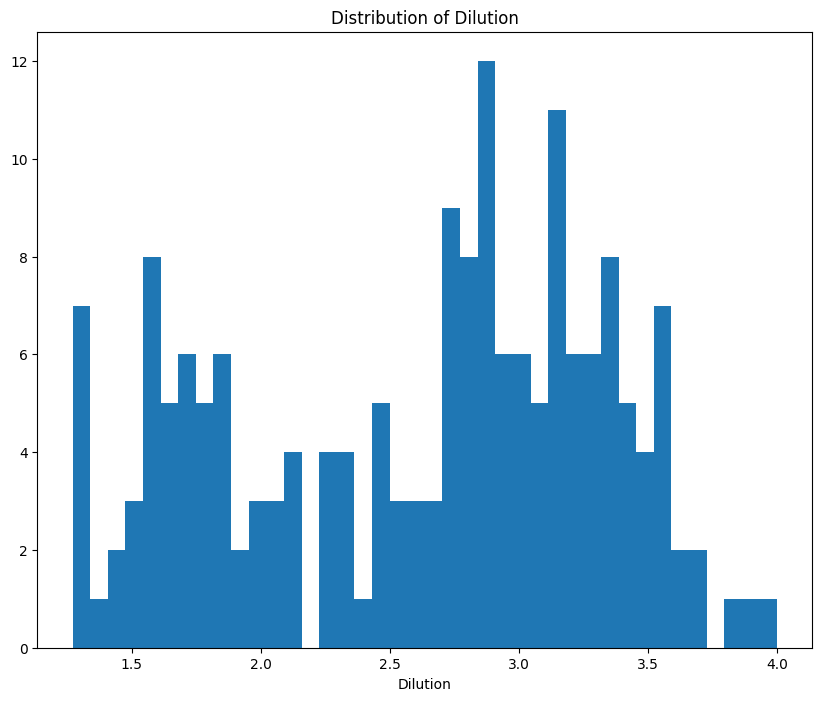

In [22]:
plt.hist(data['Dilution'],bins=40)
plt.title('Distribution of Dilution')
plt.xlabel('Dilution');

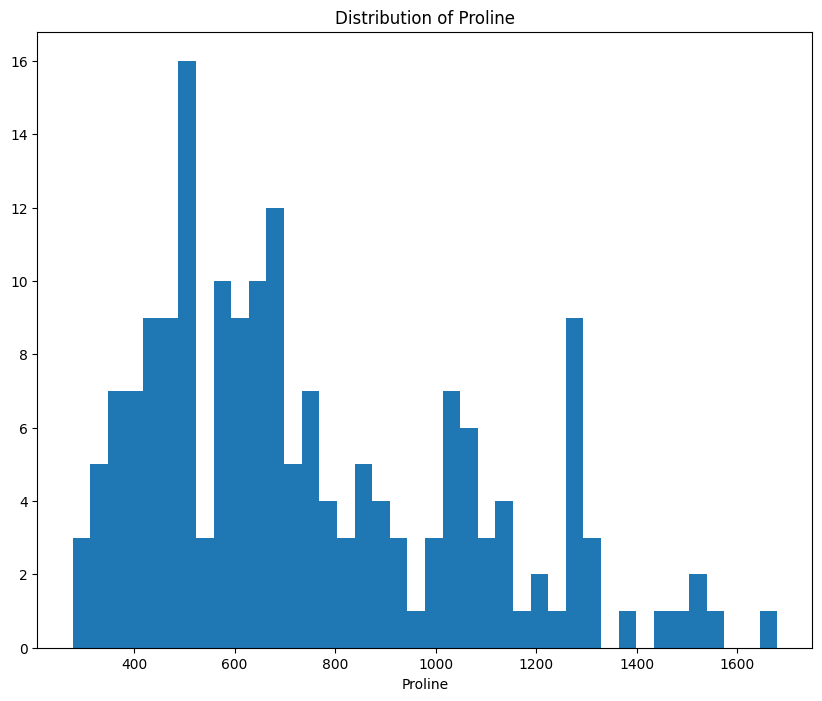

In [23]:
plt.hist(data['Proline'],bins=40)
plt.title('Distribution of Proline')
plt.xlabel('Proline');

<Axes: >

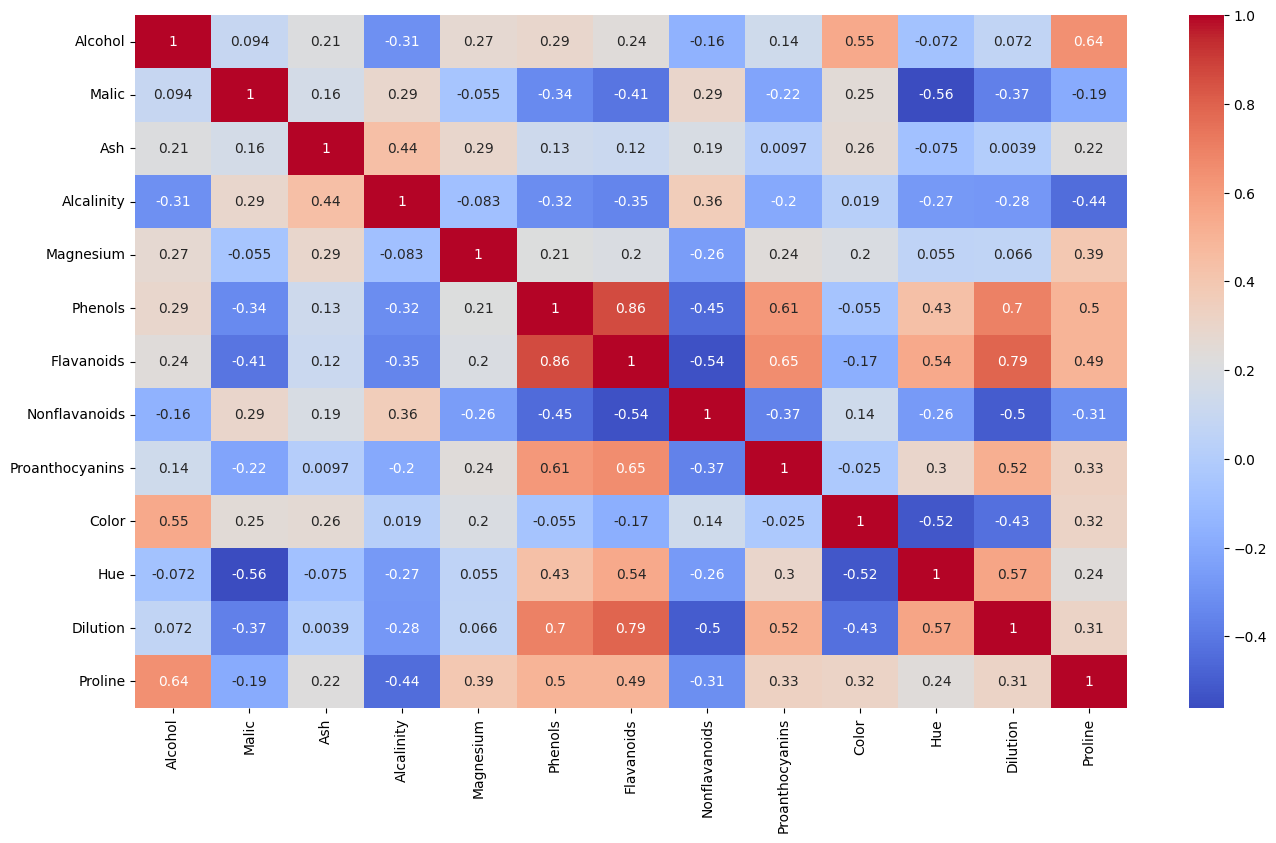

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(data.drop('Type',axis = 1).corr(), annot = True, cmap = 'coolwarm')

<Axes: >

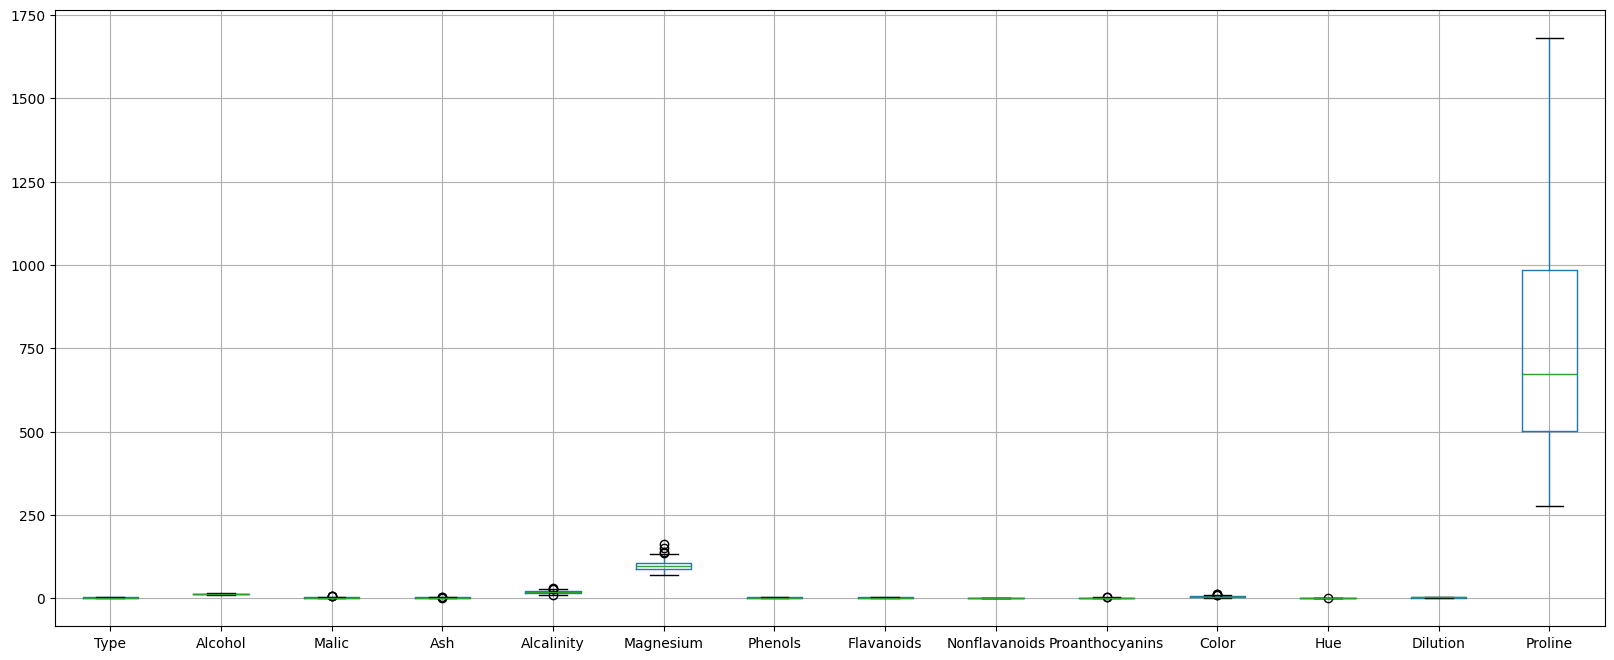

In [25]:
plt.figure(figsize = (20,8))
data.boxplot()

In [26]:
def capping(data, columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)
        data[i] = data[i].clip(lower = lower_bound, upper = upper_bound)

In [27]:
capping(data, ['Malic','Ash','Alcalinity','Magnesium','Proanthocyanins','Color','Hue'])

<Axes: >

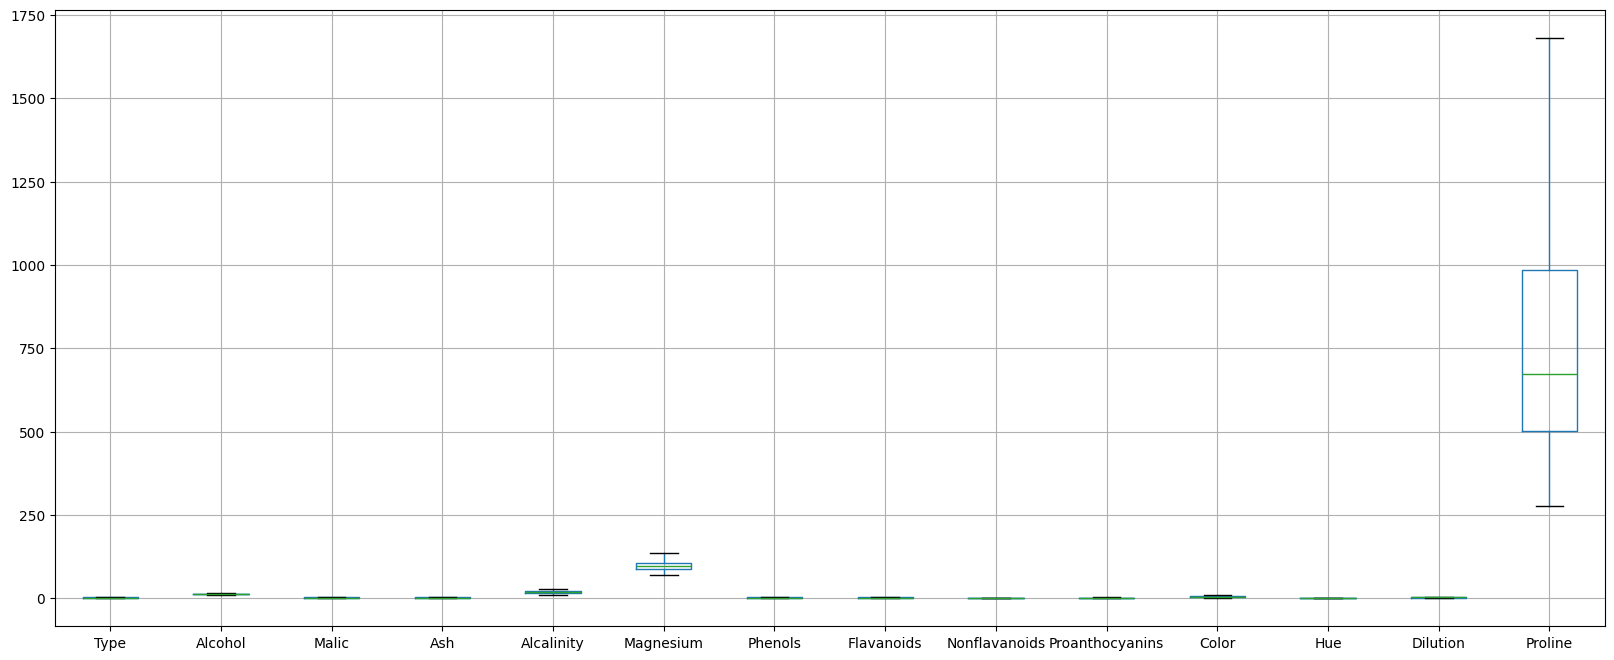

In [28]:
plt.figure(figsize = (20,8))
data.boxplot()

### Standardization

In [29]:
sc = StandardScaler()
data.loc[:, data.columns!='Type'] = sc.fit_transform(data.drop('Type', axis = 1))

In [30]:
data1 = data.copy()

In [31]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,1,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,1,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952
174,3,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893
175,3,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575
176,3,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498


### PCA

In [32]:
pca = PCA()
pcs = pca.fit_transform(data.drop('Type', axis = 1))

In [33]:
pca_df = pd.DataFrame(pcs)

In [34]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305,0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178,0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484,-0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025,-0.086492,-0.495366,0.353956,0.346681,-0.083471


In [35]:
pca.explained_variance_ratio_

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

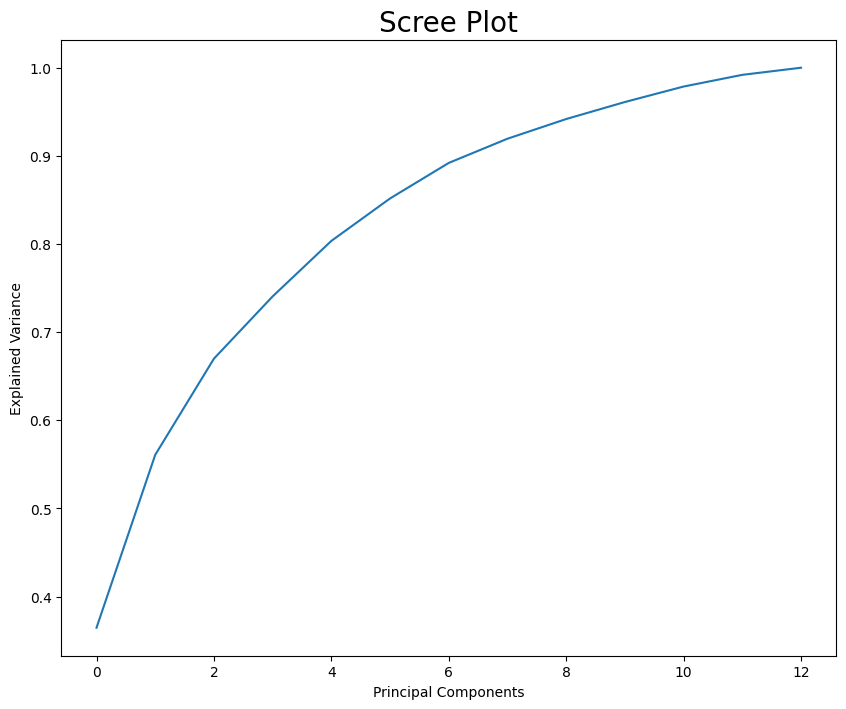

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

### PCA (with 8 components)

In [38]:
pca1 = PCA(n_components=8)
pca1_df = pca1.fit_transform(data.drop('Type', axis = 1))

In [39]:
cl_pca = pd.DataFrame(pca1_df, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [40]:
cl_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559
...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025


### K-Means without PCA

In [41]:
wcss = []
k = range(1,11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(data.drop('Type', axis = 1))
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

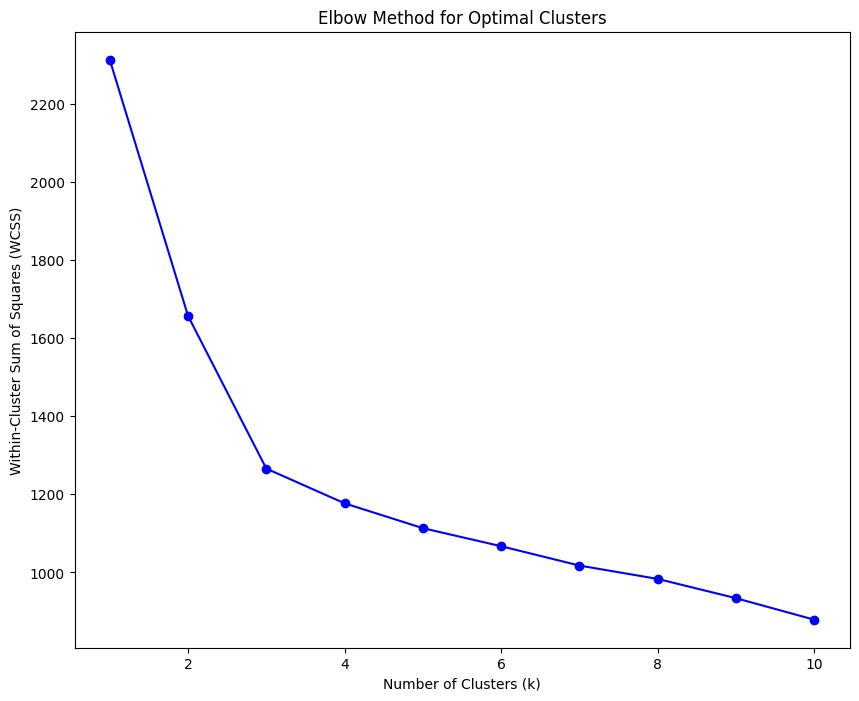

In [42]:
plt.plot(k, wcss, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

In [43]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
data['Cluster'] = kmeans.fit_predict(data.drop('Type',axis = 1))

In [44]:
score = silhouette_score(data.drop(columns=['Type','Cluster'],axis = 1), data['Cluster'])

In [45]:
print(f'Silhouette Score: {score}')

Silhouette Score: 0.2854626783251893


### K-Means with PCA

In [46]:
wcss1 = []
k = range(1,11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(cl_pca)
    wcss1.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

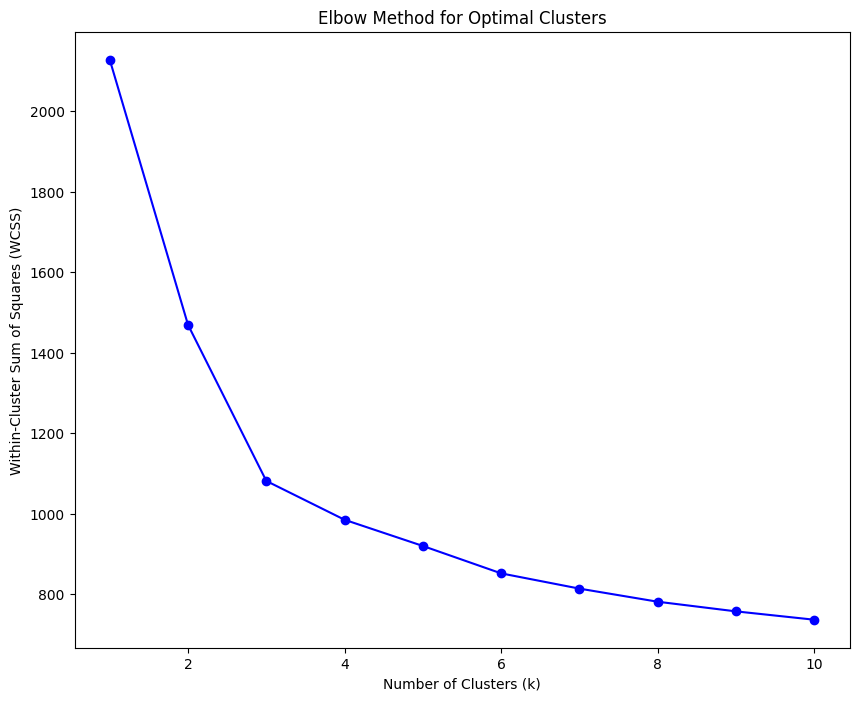

In [47]:
plt.plot(k, wcss1, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

In [48]:
kmeans1 = KMeans(n_clusters = 3, random_state = 42)
cl_pca['Cluster'] = kmeans1.fit_predict(cl_pca)

In [49]:
score1 = silhouette_score(cl_pca.drop(columns=['Cluster'],axis = 1), cl_pca['Cluster'])

In [50]:
print(f'Silhouette Score: {score1}')

Silhouette Score: 0.3152941778058692
